# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

# Calling the dataset and Its preparation

In [10]:
data =  pd.read_csv("processed_reviews_split_surnamesNOPQ_minimal.csv")
data.head(10)

,review_id,text,confidence_score,review_score,acceptance_status
0,iclr_review_0000,LEARNED STEP SIZE QUANTIZATION. Deep networks ...,NaN,6.0,Accept
1,iclr_review_0001,Extrapolation and learning equations. In class...,4.0,7.0,Accept
2,iclr_review_0002,Relational Multi-Instance Learning for Concept...,4.0,6.0,Reject
3,iclr_review_0003,Analysis of Memory Organization for Dynamic Ne...,5.0,3.0,Reject
4,iclr_review_0004,Learning Graph Representations by Dendrograms....,4.0,5.0,Reject
5,iclr_review_0005,On the Computational Inefficiency of Large Bat...,3.0,5.0,Reject
6,iclr_review_0006,Improving Invariance and Equivariance Properti...,5.0,4.0,Reject
7,iclr_review_0007,Domain Aggregation Networks for Multi-Source D...,NaN,6.0,Reject
8,iclr_review_0008,#. #. #. #,NaN,3.0,Reject
9,iclr_review_0009,Few-Shot Intent Inference via Meta-Inverse Rei...,5.0,3.0,Reject


In [11]:
data.tail(10)

,review_id,text,confidence_score,review_score,acceptance_status
6108,iclr_review_6108,PROTOTYPE-ASSISTED ADVERSARIAL LEARNING FOR UN...,NaN,3.0,Reject
6109,iclr_review_6109,Do recent advancements in model-based deep rei...,NaN,3.0,Reject
6110,iclr_review_6110,Interpretations are useful: penalizing explana...,NaN,3.0,Reject
6111,iclr_review_6111,Towards Simplicity in Deep Reinforcement Learn...,NaN,3.0,Reject
6112,iclr_review_6112,Adapting to Label Shift with Bias-Corrected Ca...,NaN,6.0,Reject
6113,iclr_review_6113,BAIL: Best-Action Imitation Learning for Batch...,NaN,1.0,Reject
6114,iclr_review_6114,INTERNAL-CONSISTENCY CONSTRAINTS FOR EMERGENT ...,NaN,3.0,Reject
6115,iclr_review_6115,Deep Neural Networks and the Tree of Life. In ...,4.0,4.0,Reject
6116,iclr_review_6116,AdaScale SGD: A Scale-Invariant Algorithm for ...,NaN,3.0,Reject
6117,iclr_review_6117,Exploring Deep Recurrent Models with Reinforce...,3.0,-1.0,Accept


In [6]:
data.describe()

,confidence_score,review_score
count,3285.000000,6118.00000
mean,3.790563,4.69222
std,0.828818,2.16378
min,1.000000,-1.00000
25%,3.000000,3.00000
50%,4.000000,5.00000
75%,4.000000,6.00000
max,5.000000,10.00000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6118 entries, 0 to 6117
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review_id          6118 non-null   object 
 1   text               6034 non-null   object 
 2   confidence_score   3285 non-null   float64
 3   review_score       6118 non-null   float64
 4   acceptance_status  5733 non-null   object 
dtypes: float64(2), object(3)
memory usage: 239.1+ KB


In [12]:
data_1 = data.dropna(subset = ['confidence_score'])

In [13]:
data_1.head(10)

,review_id,text,confidence_score,review_score,acceptance_status
1,iclr_review_0001,Extrapolation and learning equations. In class...,4.0,7.0,Accept
2,iclr_review_0002,Relational Multi-Instance Learning for Concept...,4.0,6.0,Reject
3,iclr_review_0003,Analysis of Memory Organization for Dynamic Ne...,5.0,3.0,Reject
4,iclr_review_0004,Learning Graph Representations by Dendrograms....,4.0,5.0,Reject
5,iclr_review_0005,On the Computational Inefficiency of Large Bat...,3.0,5.0,Reject
6,iclr_review_0006,Improving Invariance and Equivariance Properti...,5.0,4.0,Reject
9,iclr_review_0009,Few-Shot Intent Inference via Meta-Inverse Rei...,5.0,3.0,Reject
11,iclr_review_0011,Optimal Attacks against Multiple Classifiers. ...,4.0,6.0,Reject
12,iclr_review_0012,Algorithmic Framework for Model-based Deep Rei...,4.0,7.0,Accept
13,iclr_review_0013,Long Short-Term Memory as a Dynamically Comput...,4.0,6.0,Reject


In [15]:
data_1.shape

(3285, 5)

In [14]:
data_1.to_csv('data_1.csv')

# Visualization

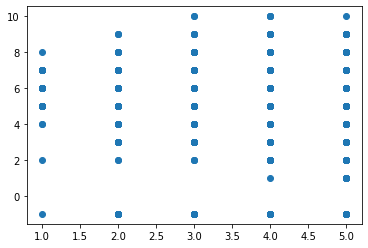

In [16]:
X = data_1.confidence_score
Y = data_1.review_score
plt.scatter(X,Y)

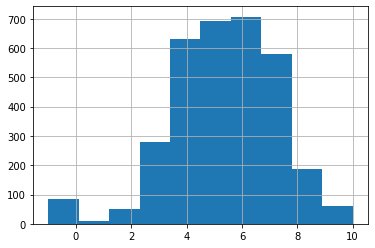

In [24]:
review_score = data_1.review_score
plt.hist(review_score)
plt.grid()

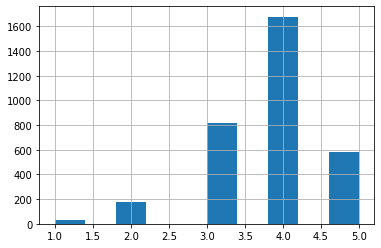

In [25]:
confidence_score = data_1.confidence_score
plt.hist(confidence_score)
plt.grid()

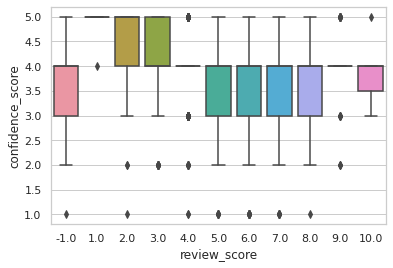

In [27]:
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=data_1['review_score'], y = data_1['confidence_score'])

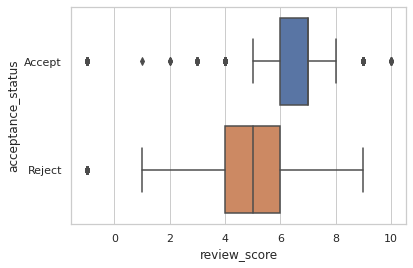

In [28]:
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=data_1['review_score'], y = data_1['acceptance_status'])

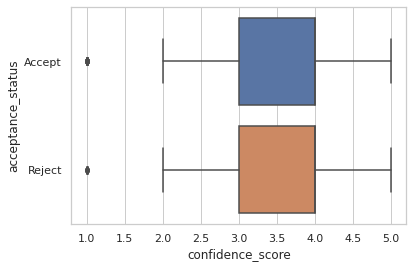

In [29]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data_1['confidence_score'], y = data_1['acceptance_status'])

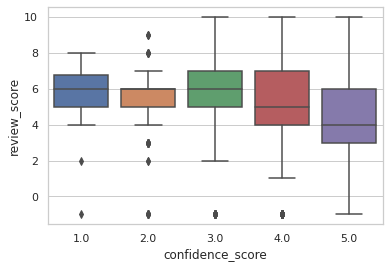

In [30]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data_1['confidence_score'], y = data_1['review_score'])

# Data Preprocessing

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [34]:
data_1.isna().sum()

review_id             0
text                 42
confidence_score      0
review_score          0
acceptance_status     0
dtype: int64

In [39]:
print (data_1[pd.to_numeric(data_1.review_id, errors='coerce').isnull()])

             review_id                                               text  \
1     iclr_review_0001  Extrapolation and learning equations. In class...   
2     iclr_review_0002  Relational Multi-Instance Learning for Concept...   
3     iclr_review_0003  Analysis of Memory Organization for Dynamic Ne...   
4     iclr_review_0004  Learning Graph Representations by Dendrograms....   
5     iclr_review_0005  On the Computational Inefficiency of Large Bat...   
...                ...                                                ...   
6102  iclr_review_6102  Quality Evaluation of GANs Using Cross Local I...   
6105  iclr_review_6105  Conditional Inference in Pre-trained Variation...   
6107  iclr_review_6107  Generative Models and Model Criticism via Opti...   
6115  iclr_review_6115  Deep Neural Networks and the Tree of Life. In ...   
6117  iclr_review_6117  Exploring Deep Recurrent Models with Reinforce...   

      confidence_score  review_score acceptance_status  
1                 

In [41]:
data_2 = pd.DataFrame(X, columns=data_1.columns)

print(data_2)


     review_id text confidence_score review_score acceptance_status
1          NaN  NaN              NaN          NaN            Accept
2          NaN  NaN              NaN          NaN            Reject
3          NaN  NaN              NaN          NaN            Reject
4          NaN  NaN              NaN          NaN            Reject
5          NaN  NaN              NaN          NaN            Reject
...        ...  ...              ...          ...               ...
6102       NaN  NaN              NaN          NaN            Reject
6105       NaN  NaN              NaN          NaN            Reject
6107       NaN  NaN              NaN          NaN            Accept
6115       NaN  NaN              NaN          NaN            Reject
6117       NaN  NaN              NaN          NaN            Accept

[3285 rows x 5 columns]


In [43]:
data_2.dropna()

,review_id,text,confidence_score,review_score,acceptance_status


In [44]:
data_1['acceptance_status'] = data_1['acceptance_status'].astype('category')
data_1.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


review_id              object
text                   object
confidence_score      float64
review_score          float64
acceptance_status    category
dtype: object

In [47]:
pd.get_dummies(data_1, columns = ["acceptance_status"]).head(10)

,review_id,text,confidence_score,review_score,acceptance_status_Accept,acceptance_status_Reject
1,iclr_review_0001,Extrapolation and learning equations. In class...,4.0,7.0,1,0
2,iclr_review_0002,Relational Multi-Instance Learning for Concept...,4.0,6.0,0,1
3,iclr_review_0003,Analysis of Memory Organization for Dynamic Ne...,5.0,3.0,0,1
4,iclr_review_0004,Learning Graph Representations by Dendrograms....,4.0,5.0,0,1
5,iclr_review_0005,On the Computational Inefficiency of Large Bat...,3.0,5.0,0,1
6,iclr_review_0006,Improving Invariance and Equivariance Properti...,5.0,4.0,0,1
9,iclr_review_0009,Few-Shot Intent Inference via Meta-Inverse Rei...,5.0,3.0,0,1
11,iclr_review_0011,Optimal Attacks against Multiple Classifiers. ...,4.0,6.0,0,1
12,iclr_review_0012,Algorithmic Framework for Model-based Deep Rei...,4.0,7.0,1,0
13,iclr_review_0013,Long Short-Term Memory as a Dynamically Comput...,4.0,6.0,0,1


In [80]:
text =  data_1.loc[:,["review_score","text"]]

In [81]:
text

,review_score,text
1,7.0,Extrapolation and learning equations. In class...
2,6.0,Relational Multi-Instance Learning for Concept...
3,3.0,Analysis of Memory Organization for Dynamic Ne...
4,5.0,Learning Graph Representations by Dendrograms....
5,5.0,On the Computational Inefficiency of Large Bat...
...,...,...
6102,6.0,Quality Evaluation of GANs Using Cross Local I...
6105,4.0,Conditional Inference in Pre-trained Variation...
6107,8.0,Generative Models and Model Criticism via Opti...
6115,4.0,Deep Neural Networks and the Tree of Life. In ...


In [54]:
text.to_csv('text_1.csv')

# Text Classification

In [56]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
import re
import os

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
def dict_merge_sum(d1, d2):
    """ Two dicionaries d1 and d2 with numerical values and
    possibly disjoint keys are merged and the values are added if
    the exist in both values, otherwise the missing value is taken to
    be 0"""
    
    return { k: d1.get(k, 0) + d2.get(k, 0) for k in set(d1) | set(d2) }

d1 = dict(a=4, b=5, d=8)
d2 = dict(a=1, d=10, e=9)

dict_merge_sum(d1, d2)

{'a': 5, 'b': 5, 'd': 18, 'e': 9}

In [58]:
class BagOfWords(object):
    """ Implementing a bag of words, words corresponding with their 
    frequency of usages in a "document" for usage by the 
    Document class, Category class and the Pool class."""
    
    def __init__(self):
        self.__number_of_words = 0
        self.__bag_of_words = {}
        
        
    def __add__(self, other):
        """ Overloading of the "+" operator to join two BagOfWords """
        
        erg = BagOfWords() 
        erg.__bag_of_words = dict_merge_sum(self.__bag_of_words, 
                                            other.__bag_of_words)
        return erg
        
    def add_word(self,word):
        """ A word is added in the dictionary __bag_of_words"""
        self.__number_of_words += 1
        if word in self.__bag_of_words:
            self.__bag_of_words[word] += 1
        else:
            self.__bag_of_words[word] = 1
    
    def len(self):
        """ Returning the number of different words of an object """
        return len(self.__bag_of_words)
    
    def Words(self):
        """ Returning a list of the words contained in the object """
        return self.__bag_of_words.keys()
    
        
    def BagOfWords(self):
        """ Returning the dictionary, containing the words (keys) with their frequency (values)"""
        return self.__bag_of_words
        
    def WordFreq(self,word):
        """ Returning the frequency of a word """
        if word in self.__bag_of_words:
            return self.__bag_of_words[word]
        else:
            return 0

In [59]:
class Document(object):
    """ Used both for learning (training) documents and for testing documents. The optional parameter lear
    has to be set to True, if a classificator should be trained. If it is a test document learn has to be set to False. """
    _vocabulary = BagOfWords()
 
    def __init__(self, vocabulary):
        self.__name = ""
        self.__document_class = None
        self._words_and_freq = BagOfWords()
        Document._vocabulary = vocabulary
    
    def read_document(self,filename, learn=False):
        """ A document is read. It is assumed that the document is either encoded in utf-8 or in iso-8859... (latin-1).
        The words of the document are stored in a Bag of Words, i.e. self._words_and_freq = BagOfWords() """
        try:
            text = open(filename,"r", encoding='utf-8').read()
        except UnicodeDecodeError:
            text = open(filename,"r", encoding='latin-1').read()
        text = text.lower()
        words = re.split(r"\W",text)

        self._number_of_words = 0
        for word in words:
            self._words_and_freq.add_word(word)
            if learn:
                Document._vocabulary.add_word(word)


    def __add__(self,other):
        """ Overloading the "+" operator. Adding two documents consists in adding the BagOfWords of the Documents """
        res = Document(Document._vocabulary)
        res._words_and_freq = self._words_and_freq + other._words_and_freq    
        return res
    
    def vocabulary_length(self):
        """ Returning the length of the vocabulary """
        return len(Document._vocabulary)
                
    def WordsAndFreq(self):
        """ Returning the dictionary, containing the words (keys) with their frequency (values) as contained
        in the BagOfWords attribute of the document"""
        return self._words_and_freq.BagOfWords()
        
    def Words(self):
        """ Returning the words of the Document object """
        d =  self._words_and_freq.BagOfWords()
        return d.keys()
    
    def WordFreq(self,word):
        """ Returning the number of times the word "word" appeared in the document """
        bow =  self._words_and_freq.BagOfWords()
        if word in bow:
            return bow[word]
        else:
            return 0
                
    def __and__(self, other):
        """ Intersection of two documents. A list of words occuring in both documents is returned """
        intersection = []
        words1 = self.Words()
        for word in other.Words():
            if word in words1:
                intersection += [word]
        return intersection

In [60]:
class Category(Document):
    def __init__(self, vocabulary):
        Document.__init__(self, vocabulary)
        self._number_of_docs = 0

    def Probability(self,word):
        """ returns the probabilty of the word "word" given the class "self" """
        voc_len = Document._vocabulary.len()
        SumN = 0
        for i in range(voc_len):
            SumN = Category._vocabulary.WordFreq(word)
        N = self._words_and_freq.WordFreq(word)
        erg = 1 + N
        erg /= voc_len + SumN
        return erg

    def __add__(self,other):
        """ Overloading the "+" operator. Adding two Category objects consists in adding the 
        BagOfWords of the Category objects """
        res = Category(self._vocabulary)
        res._words_and_freq = self._words_and_freq + other._words_and_freq 
 
        return res

    def SetNumberOfDocs(self, number):
        self._number_of_docs = number
    
    def NumberOfDocuments(self):
        return self._number_of_docs

In [61]:
class Pool(object):
    def __init__(self):
        self.__document_classes = {}
        self.__vocabulary = BagOfWords()
            
    def sum_words_in_class(self, dclass):
        """ The number of times all different words of a dclass appear in a class """
        sum = 0
        for word in self.__vocabulary.Words():
            WaF = self.__document_classes[dclass].WordsAndFreq()
            if word in WaF:
                sum +=  WaF[word]
        return sum
    
    def learn(self, directory, dclass_name):
        """ directory is a path, where the files of the class with the name dclass_name can be found """
        x = Category(self.__vocabulary)
        dir = os.listdir(directory)
        for file in dir:
            d = Document(self.__vocabulary)
            #print(directory + "/" + file)
            d.read_document(directory + "/" +  file, learn = True)
            x = x + d
        self.__document_classes[dclass_name] = x
        x.SetNumberOfDocs(len(dir))

    
    def Probability(self, doc, dclass = ""):
        """Calculates the probability for a class dclass given a document doc"""
        if dclass:
            sum_dclass = self.sum_words_in_class(dclass)
            prob = 0
        
            d = Document(self.__vocabulary)
            d.read_document(doc)

            for j in self.__document_classes:
                sum_j = self.sum_words_in_class(j)
                prod = 1
                for i in d.Words():
                    wf_dclass = 1 + self.__document_classes[dclass].WordFreq(i)
                    wf = 1 + self.__document_classes[j].WordFreq(i)
                    r = wf * sum_dclass / (wf_dclass * sum_j)
                    prod *= r
                prob += prod * self.__document_classes[j].NumberOfDocuments() / self.__document_classes[dclass].NumberOfDocuments()
            if prob != 0:
                return 1 / prob
            else:
                return -1
        else:
            prob_list = []
            for dclass in self.__document_classes:
                prob = self.Probability(doc, dclass)
                prob_list.append([dclass,prob])
            prob_list.sort(key = lambda x: x[1], reverse = True)
            return prob_list

    def DocumentIntersectionWithClasses(self, doc_name):
        res = [doc_name]
        for dc in self.__document_classes:
            d = Document(self.__vocabulary)
            d.read_document(doc_name, learn=False)
            o = self.__document_classes[dc] &  d
            intersection_ratio = len(o) / len(d.Words())
            res += (dc, intersection_ratio)
        return res

In [83]:
text =  data_1.loc[:,["text"]]
text.head()

,text
1,Extrapolation and learning equations. In class...
2,Relational Multi-Instance Learning for Concept...
3,Analysis of Memory Organization for Dynamic Ne...
4,Learning Graph Representations by Dendrograms....
5,On the Computational Inefficiency of Large Bat...


In [84]:
# Word tokenization
from spacy.lang.en import English

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

text = """Extrapolation and learning equations. In classical machine learning, regression is treated as a black box process of identifying a suitable function from a hypothesis set without attempting to gain insight into the mechanism connecting inputs and outputs. In the natural sciences, however, finding an interpretable function for a phenomenon is the prime goal as it allows to understand and generalize results. This paper proposes a novel type of function learning network, called equation learner (EQL), that can learn analytical expressions and is able to extrapolate to unseen domains. It is implemented as an end-to-end differentiable feed-forward network and allows for efficient gradient based training. Due to sparsity regularization concise interpretable expressions can be obtained. Often the true underlying source expression is identified.. Thank you for an interesting perspective on the neural approaches to approximate physical phenomenon. This paper describes a method to extrapolate a given dataset and predict formulae with naturally occurring functions like sine, cosine, multiplication etc. Pros - The approach is rather simple and hence can be applied to existing methods. The major difference is incorporating functions with 2 or more inputs which was done successfully in the paper. - It seems that MLP, even though it is good for interpolation, it fails to extrapolate data to model the correct function. It was a great idea to use basis functions like sine, cosine to make the approach more explicit. Cons - Page 8, the claim that x2 cos(ax1 + b) ~ 1.21(cos(-ax1 + ? + b + 0.41x2) + sin(ax1 + b + 0.41x2)) for y in [-2,2] is not entirely correct. There should be some restrictions on *a* and *b* as well as the approximate equality doesn*t hold for all real values of *a* and *b*. Although, for a=2*pi and b=pi/4, the claim is correct so the model is predicting a correct solution within certain limits. - Most of the experiments involve up to 4 variables. It would be interesting to see how the neural approach models hundreds of variables. - Another way of looking at the model is that the non-linearities like sine, cosine, multiplication act as basis functions. If the data is a linear combination of such functions, the model will be able to learn the weights. As division is not one of the non-linearities, predicting expressions in Equation 13 seems unlikely. Hence, I was wondering, is it possible to make sure that this architecture is a universal approximator. Suggested Edits - Page 8, It seems that there is a typographical error in the expression 1.21(cos(ax1 + ? + b + 0.41x2) + sin(ax1 + b + 0.41x2)). When compared with the predicted formula in Figure 4(b), it should be 1.21(cos(-ax1 + ? + b + 0.41x2) + sin(ax1 + b + 0.41x2)).. This paper proposes using functions such as sin and cos as basis functions, then training a neural network with L1 regularization to obtain a simple estimate of functions that can extrapolate under some circumstances. Pros: - the paper has a wide-ranging discussion connecting extrapolation in regression problems to adjacent fields of system identification and causal learning. - the method is sensible enough, and should probably be a baseline in the time-series literature. It also seems like an advance on the hard-to-optimize Eureqa method. Cons: I agree with the authors that Reviewer 5*s comments aren*t very helpful, but this paper really does ignore or dismiss a lot of recent progress and related methods. Specifically: - The authors claim that cross-validation can*t be used to choose the model, since it wouldn*t encourage extrapolation - but why not partition the data in contiguous chunks, as is done in time-series methods? - The authors introduce an annealing trick to help with the L1 objective, but there is a rich literature on gradient-based optimization methods with L1 regularization that address exactly this problem. - The authors mostly consider toy data, limiting the potential impact of their method. - The authors don*t compare against closely related methods developed to address the exact same setting. Namely, Schmit + Lipson*s Eureqa method, and the Gaussian process methods of Duvenaud, Lloyd, Grosse, Tenenbaum and Ghahramani. - The authors invent their own ad-hoc model-selection procedure, again ignoring a massive literature. Given the many *cons*, it is recommended that this paper not be presented at the conference track, but be featured at the workshop track."""

#  "nlp" Object is used to create documents with linguistic annotations.
my_doc = nlp(text)

# Create list of word tokens
token_list = []
for token in my_doc:
    token_list.append(token.text)
print(token_list)

['Extrapolation', 'and', 'learning', 'equations', '.', 'In', 'classical', 'machine', 'learning', ',', 'regression', 'is', 'treated', 'as', 'a', 'black', 'box', 'process', 'of', 'identifying', 'a', 'suitable', 'function', 'from', 'a', 'hypothesis', 'set', 'without', 'attempting', 'to', 'gain', 'insight', 'into', 'the', 'mechanism', 'connecting', 'inputs', 'and', 'outputs', '.', 'In', 'the', 'natural', 'sciences', ',', 'however', ',', 'finding', 'an', 'interpretable', 'function', 'for', 'a', 'phenomenon', 'is', 'the', 'prime', 'goal', 'as', 'it', 'allows', 'to', 'understand', 'and', 'generalize', 'results', '.', 'This', 'paper', 'proposes', 'a', 'novel', 'type', 'of', 'function', 'learning', 'network', ',', 'called', 'equation', 'learner', '(', 'EQL', ')', ',', 'that', 'can', 'learn', 'analytical', 'expressions', 'and', 'is', 'able', 'to', 'extrapolate', 'to', 'unseen', 'domains', '.', 'It', 'is', 'implemented', 'as', 'an', 'end', '-', 'to', '-', 'end', 'differentiable', 'feed', '-', 'fo

In [85]:
#Stop words
#importing stop words from English language.
import spacy
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

#Printing the total number of stop words:
print('Number of stop words: %d' % len(spacy_stopwords))

#Printing first ten stop words:
print('First ten stop words: %s' % list(spacy_stopwords)[:20])

Number of stop words: 326
First ten stop words: ['though', 'part', 'hereupon', 'elsewhere', 'but', 'still', 'various', 'except', 'you', 'besides', 'namely', 'nowhere', 'whence', 'otherwise', 'me', 'our', 'seeming', 'can', 'front', 'much']


In [86]:
from spacy.lang.en.stop_words import STOP_WORDS

#Implementation of stop words:
filtered_sent=[]

#  "nlp" Object is used to create documents with linguistic annotations.
doc = nlp(text)

# filtering stop words
for word in doc:
    if word.is_stop==False:
        filtered_sent.append(word)
print("Filtered Sentence:",filtered_sent)

Filtered Sentence: [Extrapolation, learning, equations, ., classical, machine, learning, ,, regression, treated, black, box, process, identifying, suitable, function, hypothesis, set, attempting, gain, insight, mechanism, connecting, inputs, outputs, ., natural, sciences, ,, ,, finding, interpretable, function, phenomenon, prime, goal, allows, understand, generalize, results, ., paper, proposes, novel, type, function, learning, network, ,, called, equation, learner, (, EQL, ), ,, learn, analytical, expressions, able, extrapolate, unseen, domains, ., implemented, end, -, -, end, differentiable, feed, -, forward, network, allows, efficient, gradient, based, training, ., sparsity, regularization, concise, interpretable, expressions, obtained, ., true, underlying, source, expression, identified, .., Thank, interesting, perspective, neural, approaches, approximate, physical, phenomenon, ., paper, describes, method, extrapolate, given, dataset, predict, formulae, naturally, occurring, functi

In [87]:
# Implementing lemmatization
lem = nlp("run runs running runner")
# finding lemma for each word
for word in lem:
    print(word.text,word.lemma_)

run run
runs runs
running running
runner runner


In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib
from sklearn.feature_extraction.text import CountVectorizer

In [89]:
data = pd.read_csv('text_1.csv')

In [90]:
data.head(10)

,Unnamed: 0,review_score,text
0,1,7.0,Extrapolation and learning equations. In class...
1,2,6.0,Relational Multi-Instance Learning for Concept...
2,3,3.0,Analysis of Memory Organization for Dynamic Ne...
3,4,5.0,Learning Graph Representations by Dendrograms....
4,5,5.0,On the Computational Inefficiency of Large Bat...
5,6,4.0,Improving Invariance and Equivariance Properti...
6,9,3.0,Few-Shot Intent Inference via Meta-Inverse Rei...
7,11,6.0,Optimal Attacks against Multiple Classifiers. ...
8,12,7.0,Algorithmic Framework for Model-based Deep Rei...
9,13,6.0,Long Short-Term Memory as a Dynamically Comput...


In [93]:
def preprocess_data(data):
    # Remove package name as it's not relevant
    data = data.drop('Unnamed: 0', axis=1)
    
    # Convert text to lowercase
    data['text'] = data['text'].str.strip().str.lower()
    return data

In [94]:
data = preprocess_data(data)

In [95]:
# Split into training and testing data
x = data['text']
y = data['review_score']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

In [103]:
from collections import Counter

def count_words(text):				
	skips = [".", ", ", ":", ";", "'", '"']
	for ch in skips:
		text = text.replace(ch, "")
	word_counts = {}
	for word in text.split(" "):
		if word in word_counts:
			word_counts[word]+= 1
		else:
			word_counts[word]= 1
	return word_counts

	
def count_words_fast(text):	
	text = text.lower()
	skips = [".", ", ", ":", ";", "'", '"']
	for ch in skips:
		text = text.replace(ch, "")
	word_counts = Counter(text.split(" "))
	return word_counts

	

In [114]:
# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
	separated = dict()
	for i in range(len(dataset)):
		vector = dataset[i]
		class_value = vector[-1]
		if (class_value not in separated):
			separated[class_value] = list()
		separated[class_value].append(vector)
	return separated

In [116]:
# Example of separating data by class value

# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
	separated = dict()
	for i in range(len(dataset)):
		vector = dataset[i]
		class_value = vector[-1]
		if (class_value not in separated):
			separated[class_value] = list()
		separated[class_value].append(vector)
	return separated

# Test separating data by class
dataset = [[3.393533211,2.331273381,0],
	[3.110073483,1.781539638,0],
	[1.343808831,3.368360954,0],
	[3.582294042,4.67917911,0],
	[2.280362439,2.866990263,0],
	[7.423436942,4.696522875,1],
	[5.745051997,3.533989803,1],
	[9.172168622,2.511101045,1],
	[7.792783481,3.424088941,1],
	[7.939820817,0.791637231,1]]
separated = separate_by_class(dataset)
for label in separated:
	print(label)
	for row in separated[label]:
		print(row)

0
[3.393533211, 2.331273381, 0]
[3.110073483, 1.781539638, 0]
[1.343808831, 3.368360954, 0]
[3.582294042, 4.67917911, 0]
[2.280362439, 2.866990263, 0]
1
[7.423436942, 4.696522875, 1]
[5.745051997, 3.533989803, 1]
[9.172168622, 2.511101045, 1]
[7.792783481, 3.424088941, 1]
[7.939820817, 0.791637231, 1]


In [117]:
# Calculate the mean of a list of numbers
def mean(numbers):
	return sum(numbers)/float(len(numbers))

In [118]:
from math import sqrt

# Calculate the standard deviation of a list of numbers
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return sqrt(variance)

In [119]:
# Example of summarizing a dataset
from math import sqrt

# Calculate the mean of a list of numbers
def mean(numbers):
	return sum(numbers)/float(len(numbers))

# Calculate the standard deviation of a list of numbers
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return sqrt(variance)

# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
	summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
	del(summaries[-1])
	return summaries

# Test summarizing a dataset
dataset = [[3.393533211,2.331273381,0],
	[3.110073483,1.781539638,0],
	[1.343808831,3.368360954,0],
	[3.582294042,4.67917911,0],
	[2.280362439,2.866990263,0],
	[7.423436942,4.696522875,1],
	[5.745051997,3.533989803,1],
	[9.172168622,2.511101045,1],
	[7.792783481,3.424088941,1],
	[7.939820817,0.791637231,1]]
summary = summarize_dataset(dataset)
print(summary)

[(5.178333386499999, 2.7665845055177263, 10), (2.9984683241, 1.218556343617447, 10)]


In [120]:
# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
	separated = separate_by_class(dataset)
	summaries = dict()
	for class_value, rows in separated.items():
		summaries[class_value] = summarize_dataset(rows)
	return summaries

In [121]:
# Example of summarizing data by class value
from math import sqrt

# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
	separated = dict()
	for i in range(len(dataset)):
		vector = dataset[i]
		class_value = vector[-1]
		if (class_value not in separated):
			separated[class_value] = list()
		separated[class_value].append(vector)
	return separated

# Calculate the mean of a list of numbers
def mean(numbers):
	return sum(numbers)/float(len(numbers))

# Calculate the standard deviation of a list of numbers
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return sqrt(variance)

# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
	summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
	del(summaries[-1])
	return summaries

# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
	separated = separate_by_class(dataset)
	summaries = dict()
	for class_value, rows in separated.items():
		summaries[class_value] = summarize_dataset(rows)
	return summaries

# Test summarizing by class
dataset = [[3.393533211,2.331273381,0],
	[3.110073483,1.781539638,0],
	[1.343808831,3.368360954,0],
	[3.582294042,4.67917911,0],
	[2.280362439,2.866990263,0],
	[7.423436942,4.696522875,1],
	[5.745051997,3.533989803,1],
	[9.172168622,2.511101045,1],
	[7.792783481,3.424088941,1],
	[7.939820817,0.791637231,1]]
summary = summarize_by_class(dataset)
for label in summary:
	print(label)
	for row in summary[label]:
		print(row)

0
(2.7420144012, 0.9265683289298018, 5)
(3.0054686692, 1.1073295894898725, 5)
1
(7.6146523718, 1.2344321550313704, 5)
(2.9914679790000003, 1.4541931384601618, 5)


In [122]:
# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
	exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (sqrt(2 * pi) * stdev)) * exponent

In [123]:
# Example of Gaussian PDF
from math import sqrt
from math import pi
from math import exp

# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
	exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (sqrt(2 * pi) * stdev)) * exponent

# Test Gaussian PDF
print(calculate_probability(1.0, 1.0, 1.0))
print(calculate_probability(2.0, 1.0, 1.0))
print(calculate_probability(0.0, 1.0, 1.0))

0.3989422804014327
0.24197072451914337
0.24197072451914337


In [124]:
# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
	total_rows = sum([summaries[label][0][2] for label in summaries])
	probabilities = dict()
	for class_value, class_summaries in summaries.items():
		probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
		for i in range(len(class_summaries)):
			mean, stdev, count = class_summaries[i]
			probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
	return probabilities

In [127]:
# Example of calculating class probabilities
from math import sqrt
from math import pi
from math import exp

# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
	separated = dict()
	for i in range(len(dataset)):
		vector = dataset[i]
		class_value = vector[-1]
		if (class_value not in separated):
			separated[class_value] = list()
		separated[class_value].append(vector)
	return separated

# Calculate the mean of a list of numbers
def mean(numbers):
	return sum(numbers)/float(len(numbers))

# Calculate the standard deviation of a list of numbers
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return sqrt(variance)

# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
	summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
	del(summaries[-1])
	return summaries

# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
	separated = separate_by_class(dataset)
	summaries = dict()
	for class_value, rows in separated.items():
		summaries[class_value] = summarize_dataset(rows)
	return summaries

# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
	exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (sqrt(2 * pi) * stdev)) * exponent

# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
	total_rows = sum([summaries[label][0][2] for label in summaries])
	probabilities = dict()
	for class_value, class_summaries in summaries.items():
		probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
		for i in range(len(class_summaries)):
			mean, stdev, _ = class_summaries[i]
			probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
	return probabilities

# Test calculating class probabilities
dataset = [[3.393533211,2.331273381,0],
	[3.110073483,1.781539638,0],
	[1.343808831,3.368360954,0],
	[3.582294042,4.67917911,0],
	[2.280362439,2.866990263,0],
	[7.423436942,4.696522875,1],
	[5.745051997,3.533989803,1],
	[9.172168622,2.511101045,1],
	[7.792783481,3.424088941,1],
	[7.939820817,0.791637231,1]]
summaries = summarize_by_class(dataset)
probabilities = calculate_class_probabilities(summaries, dataset[0])
print(probabilities)

{0: 0.05032427673372076, 1: 0.00011557718379945765}


In [128]:
# load the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

# store the feature matrix (X) and response vector (y)
X = iris.data
y = iris.target

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# making predictions on the testing set
y_pred = gnb.predict(X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)


Gaussian Naive Bayes model accuracy(in %): 95.0


In [113]:
# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# function to print sentiments
# of the sentence.
def sentiment_scores(sentence):

	# Create a SentimentIntensityAnalyzer object.
	sid_obj = SentimentIntensityAnalyzer()

	# polarity_scores method of SentimentIntensityAnalyzer
	# object gives a sentiment dictionary.
	# which contains pos, neg, neu, and compound scores.
	sentiment_dict = sid_obj.polarity_scores(sentence)
	
	print("Overall sentiment dictionary is : ", sentiment_dict)
	print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
	print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
	print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")

	print("Sentence Overall Rated As", end = " ")

	# decide sentiment as positive, negative and neutral
	if sentiment_dict['compound'] >= 0.05 :
		print("Positive")

	elif sentiment_dict['compound'] <= - 0.05 :
		print("Negative")

	else :
		print("Neutral")



# Driver code
if __name__ == "__main__" :

	print("\n1st statement :")
	sentence = "Extrapolation and learning equations. In classical machine learning, regression is treated as a black box process of identifying a suitable function from a hypothesis set without attempting to gain insight into the mechanism connecting inputs and outputs. In the natural sciences, however, finding an interpretable function for a phenomenon is the prime goal as it allows to understand and generalize results. This paper proposes a novel type of function learning network, called equation learner (EQL), that can learn analytical expressions and is able to extrapolate to unseen domains. It is implemented as an end-to-end differentiable feed-forward network and allows for efficient gradient based training. Due to sparsity regularization concise interpretable expressions can be obtained. Often the true underlying source expression is identified.. Thank you for an interesting perspective on the neural approaches to approximate physical phenomenon. This paper describes a method to extrapolate a given dataset and predict formulae with naturally occurring functions like sine, cosine, multiplication etc. Pros - The approach is rather simple and hence can be applied to existing methods. The major difference is incorporating functions with 2 or more inputs which was done successfully in the paper. - It seems that MLP, even though it is good for interpolation, it fails to extrapolate data to model the correct function. It was a great idea to use basis functions like sine, cosine to make the approach more explicit. Cons - Page 8, the claim that x2 cos(ax1 + b) ~ 1.21(cos(-ax1 + ? + b + 0.41x2) + sin(ax1 + b + 0.41x2)) for y in [-2,2] is not entirely correct. There should be some restrictions on *a* and *b* as well as the approximate equality doesn*t hold for all real values of *a* and *b*. Although, for a=2*pi and b=pi/4, the claim is correct so the model is predicting a correct solution within certain limits. - Most of the experiments involve up to 4 variables. It would be interesting to see how the neural approach models hundreds of variables. - Another way of looking at the model is that the non-linearities like sine, cosine, multiplication act as basis functions. If the data is a linear combination of such functions, the model will be able to learn the weights. As division is not one of the non-linearities, predicting expressions in Equation 13 seems unlikely. Hence, I was wondering, is it possible to make sure that this architecture is a universal approximator. Suggested Edits - Page 8, It seems that there is a typographical error in the expression 1.21(cos(ax1 + ? + b + 0.41x2) + sin(ax1 + b + 0.41x2)). When compared with the predicted formula in Figure 4(b), it should be 1.21(cos(-ax1 + ? + b + 0.41x2) + sin(ax1 + b + 0.41x2)).. This paper proposes using functions such as sin and cos as basis functions, then training a neural network with L1 regularization to obtain a simple estimate of functions that can extrapolate under some circumstances. Pros: - the paper has a wide-ranging discussion connecting extrapolation in regression problems to adjacent fields of system identification and causal learning. - the method is sensible enough, and should probably be a baseline in the time-series literature. It also seems like an advance on the hard-to-optimize Eureqa method. Cons: I agree with the authors that Reviewer 5*s comments aren*t very helpful, but this paper really does ignore or dismiss a lot of recent progress and related methods. Specifically: - The authors claim that cross-validation can*t be used to choose the model, since it wouldn*t encourage extrapolation - but why not partition the data in contiguous chunks, as is done in time-series methods? - The authors introduce an annealing trick to help with the L1 objective, but there is a rich literature on gradient-based optimization methods with L1 regularization that address exactly this problem. - The authors mostly consider toy data, limiting the potential impact of their method. - The authors don*t compare against closely related methods developed to address the exact same setting. Namely, Schmit + Lipson*s Eureqa method, and the Gaussian process methods of Duvenaud, Lloyd, Grosse, Tenenbaum and Ghahramani. - The authors invent their own ad-hoc model-selection procedure, again ignoring a massive literature. Given the many *cons*, it is recommended that this paper not be presented at the conference track, but be featured at the workshop track. "

	# function calling
	sentiment_scores(sentence)

	
	print("\n3rd Statement :")
	sentence = "Revisiting Denoising Auto-Encoders. Denoising auto-encoders (DAE)s were proposed as a simple yet powerful way to obtain representations in an unsupervised manner by learning a map that approximates the clean inputs from their corrupted versions. However, the original objective function proposed for DAEs does not guarantee that denoising happens only at the encoding stages. We argue that a better representation can be obtained if the encoder is forced to carry out most of the denoising effort. Here, we propose a simple modification to the DAE*s objective function that accomplishes the above goal.. The paper proposes a modified DAE objective where it is the mapped representation of the corrupted input that is pushed closer to the representation of the uncorrupted input. This thus borrows from both denoising (DAE) for the stochasticity and from the contractive (CAE) auto-encoders objectives (which the paper doesn’t compare to) for the representational closeness, and as such appears rather incremental. In common with the CAE, a collapse of the representation can only be avoided by additional external constraints, such as tied weights, batch normalization or other normalization heuristics. While I appreciates that the authors added a paragraph discussing this point and the usual remediations after I had raised it in an earlier question, I think it would deserve a proper formal treatment. Note that such external constraints do not seem to arise from the information-theoretic formalism as articulated by the authors. This casts doubt regarding the validity or completeness of the proposed formal motivation as currently exposed. What the extra regularization does from an information-theoretic perspective remains unclearly articulated (e.g. interpretation of lambda strength?). On the experimental front, empirical support for the approach is very weak: few experiments on synthetic and small scale data. The modified DAE*s test errors on MNIST are larger than those of Original DAE all the time expect for one precise setting of lambda, and then the original DAE performance is still within the displayed error-bar of the modified DAE. So, it is unclear whether the improvement is actually statistically significant.. The proposed modification of the denoising autoencoder objective is interesting. Shifting some of the burden to the encoder has potential, but the authors need to to show that this burden cannot be transferred to the decoder; they propose some ways of doing this in their response, but these should be explored. And more convincing, larger-scale results are needed."
	sentiment_scores(sentence)



1st statement :
Overall sentiment dictionary is :  {'neg': 0.029, 'neu': 0.891, 'pos': 0.08, 'compound': 0.9834}
sentence was rated as  2.9000000000000004 % Negative
sentence was rated as  89.1 % Neutral
sentence was rated as  8.0 % Positive
Sentence Overall Rated As Positive

3rd Statement :
Overall sentiment dictionary is :  {'neg': 0.056, 'neu': 0.874, 'pos': 0.07, 'compound': 0.6073}
sentence was rated as  5.6000000000000005 % Negative
sentence was rated as  87.4 % Neutral
sentence was rated as  7.000000000000001 % Positive
Sentence Overall Rated As Positive
